<a href="https://colab.research.google.com/github/farshidehkordi/Graph_calcul/blob/main/5c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/farshidehkordi/Graph_calcul.git


In [2]:
!pip install git+https://github.com/farshidehkordi/Graph_calcul.git

  Cloning https://github.com/farshidehkordi/Graph_calcul.git to /tmp/pip-req-build-3l7tgie5
  Running command git clone --filter=blob:none --quiet https://github.com/farshidehkordi/Graph_calcul.git /tmp/pip-req-build-3l7tgie5
  Resolved https://github.com/farshidehkordi/Graph_calcul.git to commit 5019da19c1944dc0a22519dbfff3172a3d9458be
ERROR: git+https://github.com/farshidehkordi/Graph_calcul.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [3]:
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6).
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 33 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/m

In [4]:
%ls

Graph_calcul/  sample_data/


In [5]:
%cd Graph_calcul/

/content/Graph_calcul


In [6]:

!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.12-cp310-cp310-linux_x86_64.whl size=168132 sha256=528787eb1144a54ce5f14c2bdb827bf7a61e2f2691a54a2ce1bade3bf374edf6
  Stored in directory: /root/.cache/pip/wheels/1d/ee/b5/a2f54f9e9b3951599c05dcce270ca85e472f8e6cec470e397a
Successfully built pygraphviz


In [7]:
import numpy as np

from operations import *

class Variable:
    def __init__(self, data):
        self.data = data
        self.grad = 0

def test_operations():
    # Create instances of Variable
    a = Variable(np.array([[2, 3], [4, 5]]))
    b = Variable(np.array([[1, 1], [2, 2]]))

    # Test addition
    c = Variable(add_forward(a, b))
    add_backward(a, b, 1)
    print("Addition:")
    print("Forward pass result:", c.data)
    print("Backward pass gradient (a):", a.grad)
    print("Backward pass gradient (b):", b.grad)

    # Test subtraction
    d = Variable(sub_forward(a, b))
    sub_backward(a, b, 1)
    print("\nSubtraction:")
    print("Forward pass result:", d.data)
    print("Backward pass gradient (a):", a.grad)
    print("Backward pass gradient (b):", b.grad)

    # Test multiplication
    e = Variable(mul_forward(a, b))
    mul_backward(a, b, 1)
    print("\nMultiplication:")
    print("Forward pass result:", e.data)
    print("Backward pass gradient (a):", a.grad)
    print("Backward pass gradient (b):", b.grad)

    # Test matrix multiplication
    g = Variable(matmul_forward(a, b))
    matmul_backward(a, b, np.ones_like(g.data))
    print("\nMatrix Multiplication:")
    print("Forward pass result:", g.data)
    print("Backward pass gradient (a):", a.grad)
    print("Backward pass gradient (b):", b.grad)

    # Test ReLU
    h = Variable(relu_forward(a))
    relu_backward(a, 1)
    print("\nReLU:")
    print("Forward pass result:", h.data)
    print("Backward pass gradient (a):", a.grad)

    # Test Sigmoid
    i = Variable(sigmoid_forward(a))
    sigmoid_backward(a, 1)
    print("\nSigmoid:")
    print("Forward pass result:", i.data)
    print("Backward pass gradient (a):", a.grad)

    # Test Log
    j = Variable(log_forward(a))
    log_backward(a, 1)
    print("\nLog:")
    print("Forward pass result:", j.data)
    print("Backward pass gradient (a):", a.grad)

    # Test NLL
    scores = Variable(np.array([[0.1, 0.9], [0.8, 0.2]]))
    label = Variable(np.array([1, 0]))
    k = Variable(nll_forward(scores, label))
    nll_backward(scores, label, 1)
    print("\nNegative Log Likelihood (NLL):")
    print("Forward pass result:", k.data)
    print("Backward pass gradient (scores):", scores.grad)

# Run the test
test_operations()

Addition:
Forward pass result: [[3 4]
 [6 7]]
Backward pass gradient (a): 1
Backward pass gradient (b): 1

Subtraction:
Forward pass result: [[1 2]
 [2 3]]
Backward pass gradient (a): 2
Backward pass gradient (b): 0

Multiplication:
Forward pass result: [[ 2  3]
 [ 8 10]]
Backward pass gradient (a): [[3 3]
 [4 4]]
Backward pass gradient (b): [[2 3]
 [4 5]]

Matrix Multiplication:
Forward pass result: [[ 8  8]
 [14 14]]
Backward pass gradient (a): [[5 7]
 [6 8]]
Backward pass gradient (b): [[ 8  9]
 [12 13]]

ReLU:
Forward pass result: [[2 3]
 [4 5]]
Backward pass gradient (a): [[6 8]
 [7 9]]

Sigmoid:
Forward pass result: [[0.88079708 0.95257413]
 [0.98201379 0.99330715]]
Backward pass gradient (a): [[  4   2]
 [ -5 -11]]

Log:
Forward pass result: [[0.69314718 1.09861229]
 [1.38629436 1.60943791]]
Backward pass gradient (a): [[  4   2]
 [ -5 -11]]

Negative Log Likelihood (NLL):
Forward pass result: [0.37110067 0.43748795]
Backward pass gradient (scores): [[ 0.31002552 -0.31002552]
 [

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from networkx.drawing.nx_agraph import graphviz_layout

from operations import *

class Variable:
    def __init__(self, data, name='', _children=(), _op=''):
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self._name = name

    def zero_grad(self):
        self.grad = 0

    def _generic_unop(self, forward, backward, op):
        out = Variable(forward(self), _children=(self,), _op=op)

        def _backward():
            backward(self, out.grad)

        out._backward = _backward

        return out

    def _generic_binop(self, other, forward, backward, op):
        other = other if isinstance(other, Variable) else Variable(other)
        out = Variable(forward(self, other), _children=(self, other), _op=op)

        def _backward():
            backward(self, other, out.grad)

        out._backward = _backward

        return out

    def __add__(self, other):
        return self._generic_binop(other, add_forward, add_backward, '+')

    def __sub__(self, other):
        return self._generic_binop(other, sub_forward, sub_backward, '-')

    def __mul__(self, other):
        return self._generic_binop(other, mul_forward, mul_backward, '*')

    def __truediv__(self, other):
        return self._generic_binop(other, div_forward, div_backward, '/')

    def __matmul__(self, other):
        return self._generic_binop(other, matmul_forward, matmul_backward, '@')

    def __neg__(self):
        return self * -1

    def relu(self):
        return self._generic_unop(relu_forward, relu_backward, 'ReLU')

    def sigmoid(self):
        return self._generic_unop(sigmoid_forward, sigmoid_backward, 'σ')

    def log(self):
        return self._generic_unop(log_forward, log_backward, 'log')

    def nll(self, other):
        return self._generic_binop(other, nll_forward, nll_backward, 'NLL')

    def backward(self, _initial_grad=None):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        if _initial_grad is None:
            _initial_grad = np.array([1])

        self.grad = _initial_grad
        for v in reversed(topo):
            v._backward()

    def __repr__(self):
        return f'Value({("name=" + self._name + " ") if self._name != "" else ""}data={self.data}, grad={self.grad})'

    def show(self):
        graph = nx.DiGraph()
        labels = dict()
        seen = set()

        def size_to_str(size):
            return '(' + ', '.join(['%d' % v for v in size]) + ')'

        def add_nodes(var, parent=None):
            if var in seen:
                return
            var_id = str(id(var))
            graph.add_node(var_id)
            has_shape = hasattr(var.data, 'shape')
            labels[var_id] = f'{var._name if var._name != "" else "Var"}\n' + (
                size_to_str(var.data.shape) if has_shape else '')
            if parent is not None:
                graph.add_edge(parent, var_id)
            new_parent = var_id

            is_op = var._op != ''
            if is_op:
                op_id = var_id + '_op_' + var._op
                graph.add_node(op_id)
                labels[op_id] = var._op
                graph.add_edge(var_id, op_id)
                new_parent = op_id
            seen.add(var)
            for c in var._prev:
                add_nodes(c, new_parent)

        add_nodes(self)

        plt.figure(figsize=(10, 15))
        pos = graphviz_layout(graph, prog="dot")
        nx.draw(graph, pos=pos, labels=labels, with_labels=True, node_size=1e3, node_color='lightblue', node_shape='s')
        plt.show()

Value(data=[-0.5  1.4], grad=0)
a1: [-0.5  1.4]
h1: [0.  1.4]
a2: [ 1.02 -0.72]
h2: [1.02 0.  ]
a3: [-0.01]
h3: [0.49750002]


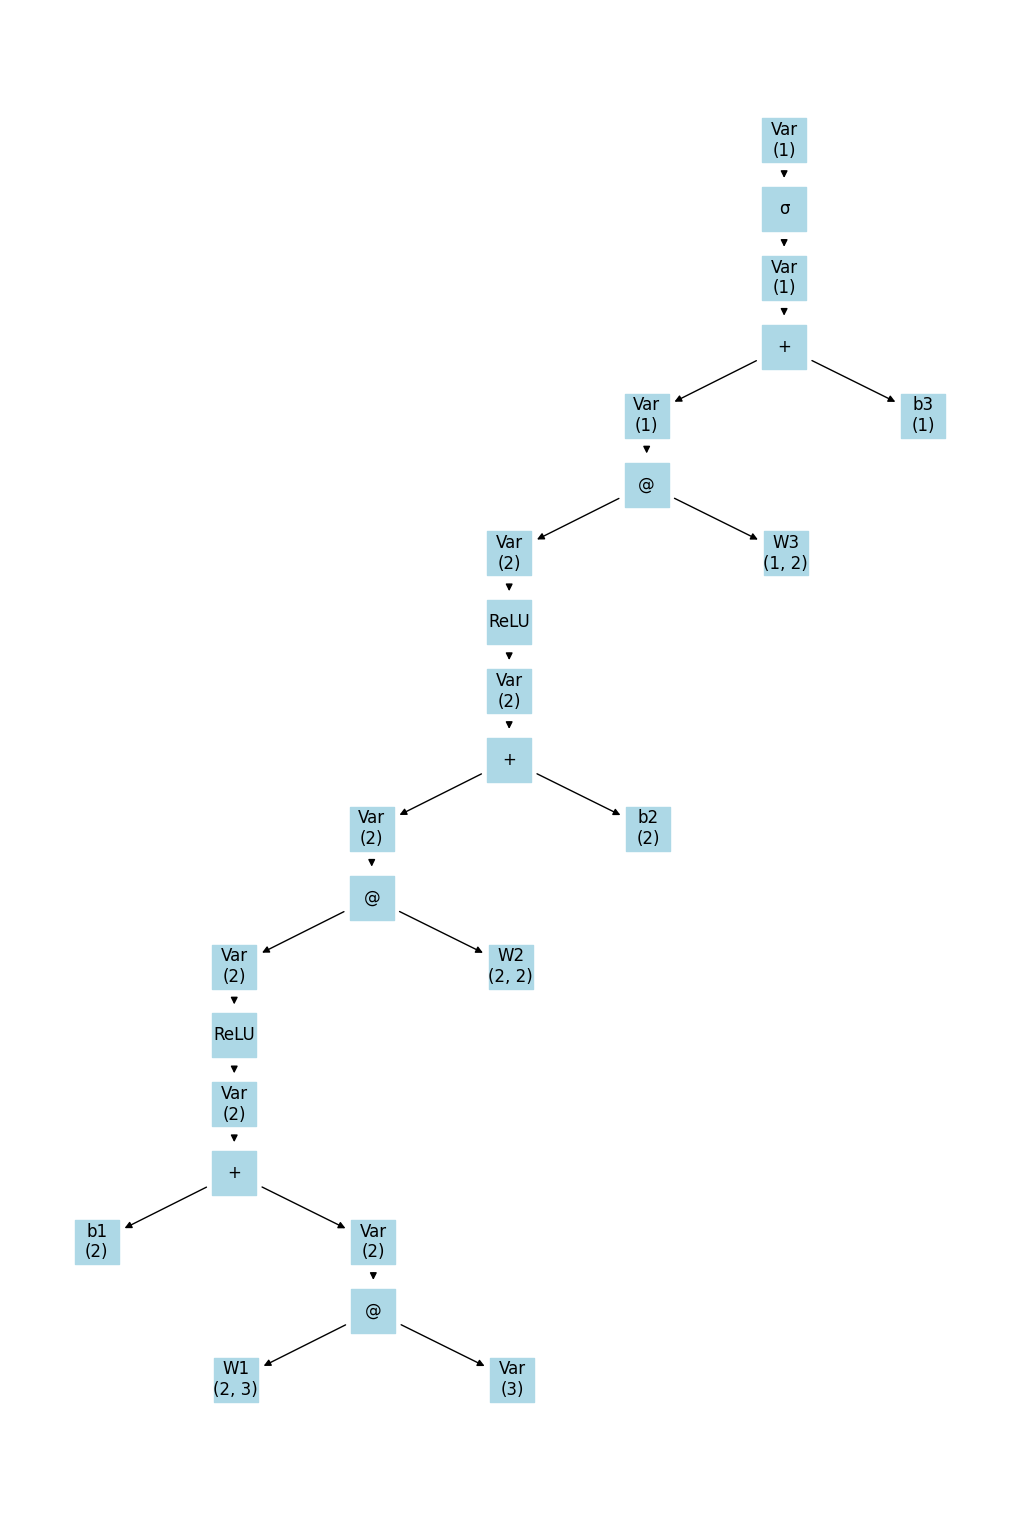

In [10]:
import numpy as np

from scratch_grad import Variable

class NeuralNetwork:
    def __init__(self):
        # Define network parameters
        self.W1 = Variable(np.array([[1.0, -1.0, -2.0], [-0.6, 0.2, -0.4]]), name='W1')
        self.b1 = Variable(np.array([0.5, 2.8]), name='b1')

        self.W2 = Variable(np.array([[0.3, 0.8], [-1.5, -0.8]]), name='W2')
        self.b2 = Variable(np.array([-0.1, 0.4]), name='b2')

        self.W3 = Variable(np.array([[-0.5, 1.5]]), name='W3')
        self.b3 = Variable(np.array([0.5]), name='b3')

    def forward(self, x):
        # Forward pass
        # Assuming a1, h1, a2, h2, a3, h3 are instances of the Variable class
        a1 =self.W1 @ x + self.b1
        print(a1)
        h1 = a1.relu()

        a2 = self.W2 @ h1 + self.b2
        h2 = a2.relu()

        a3 = self.W3 @ h2 + self.b3
        h3 = a3.sigmoid()


   # Print or visualize values of intermediate variables
        print("a1:", a1.data)
        print("h1:", h1.data)
        print("a2:", a2.data)
        print("h2:", h2.data)
        print("a3:", a3.data)
        print("h3:", h3.data)

        return h3

    def backward(self, gradient):
        # Backward pass
        h3.backward(gradient)

        # Print or visualize gradients of parameters
        print("W1 gradient:", self.W1.grad)
        print("b1 gradient:", self.b1.grad)
        print("W2 gradient:", self.W2.grad)
        print("b2 gradient:", self.b2.grad)
        print("W3 gradient:", self.W3.grad)
        print("b3 gradient:", self.b3.grad)


if __name__ == "__main__":
    # Create a neural network instance
    network = NeuralNetwork()

    # Define an input example
    x = Variable(np.array([2, 1, 1]))

    # Perform forward pass
    output = network.forward(x)

    # Display the computational graph
    output.show()
